In this project we will predict movie's prediction through machine learning algorithm. Dataset have been provided by kaggle.

In [1]:
#Importing Libraries

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Data reading.
data_train = pd.read_csv('MoviePred_Kaggle/train.csv')
data_test = pd.read_csv('MoviePred_Kaggle/test.csv')
print(len(data_train));

3000


In [3]:
data_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
#Data exploration
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

### Important Questions need to be answered

Q1-Which features are categorical?

Q2-Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Q3- Which features may contain errors or typos?

Q4- Which features contain blank, null or empty values?

Categorical:

Genres, original language, production country, production company, spoken language

Numerical:
No discrete values
budget, popularity, runtime, revenue are continous values.
Release date is datetime.

Lets check for blank, null or empty values.

In [5]:
#Null value exploration code
print(data_train.isnull().sum())

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64


In [6]:
#I am removing columns: belongs to, homepage, tagline and keywords.
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)
#'homepage','tagline'          'homepage','tagline',
data_train = data_train.drop(['belongs_to_collection','Keywords','poster_path'], axis=1)
data_test = data_test.drop(['belongs_to_collection','Keywords','Keywords','poster_path'], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (3000, 23) (4398, 22) (3000, 23) (4398, 22)
After (3000, 20) (4398, 19) (3000, 20) (4398, 19)


In [7]:
#genres
data_train["genres"].describe()

combine = [data_train, data_test]
freq_port = data_train.genres.dropna().mode()[0]
freq_port1 = data_train.overview.dropna().mode()[0]
freq_port2 = data_train.spoken_languages.dropna().mode()[0]
freq_port3 = data_train.cast.dropna().mode()[0]
freq_port4 = data_train.crew.dropna().mode()[0]

for dataset in combine:
    dataset['genres'] = dataset['genres'].fillna(freq_port)
    dataset['overview'] = dataset['overview'].fillna(freq_port1)
    dataset['spoken_languages'] = dataset['spoken_languages'].fillna(freq_port2)
    dataset['cast'] = dataset['cast'].fillna(freq_port3)
    dataset['crew'] = dataset['crew'].fillna(freq_port4)
    
##-------------------------------------------------------------------------------------------
#For integers Calculating Median
#median = data_train['Age'].median()
#data_train['Age'].fillna(median, inplace=True)
#data_test['Age'].fillna(median, inplace=True)
#data_train.isnull().sum() 

#For non integers

#freq_port = data_train.Embarked.dropna().mode()[0]
#for dataset in combine2:
    #dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [8]:
#For integers Calculating Median
median = data_train['runtime'].median()
data_train['runtime'].fillna(median, inplace=True)
data_test['runtime'].fillna(median, inplace=True)
#data_train.isnull().sum() 


In [9]:
#Null value exploration code
print(data_test.isnull().sum())

id                         0
budget                     0
genres                     0
homepage                2978
imdb_id                    0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies     258
production_countries     102
release_date               1
runtime                    0
spoken_languages           0
status                     2
tagline                  863
title                      3
cast                       0
crew                       0
dtype: int64


In [10]:
#test dataset

combine3 = [data_test]
freq_port = data_test.release_date.dropna().mode()[0]
freq_port1 = data_test.status.dropna().mode()[0]
freq_port2 = data_test.title.dropna().mode()[0]

for dataset in combine3:
    dataset['release_date'] = dataset['release_date'].fillna(freq_port)
    dataset['status'] = dataset['status'].fillna(freq_port1)
    dataset['title'] = dataset['title'].fillna(freq_port2)

In [11]:
data_train.describe(include='all')

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,cast,crew,revenue
count,3000.000000,3.000000e+03,3000,946,3000,3000,3000,3000,3000.000000,2844,2945,3000,3000.000000,3000,3000,2403,3000,3000,3000,3.000000e+03
unique,NaN,NaN,872,941,3000,36,2975,2992,NaN,2383,321,2398,NaN,401,2,2400,2969,2975,2984,NaN
top,NaN,NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0280380,en,Priest,"""Beer for My Horses"" tells the story of two be...",NaN,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Scarface,[],"[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",NaN
freq,NaN,NaN,273,4,1,2575,2,9,NaN,51,1752,5,NaN,1837,2996,3,2,26,17,NaN
mean,1500.500000,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,107.854000,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,22.079293,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


### We have now remove all null values from our datasets lets move towards: 

## "EDA"


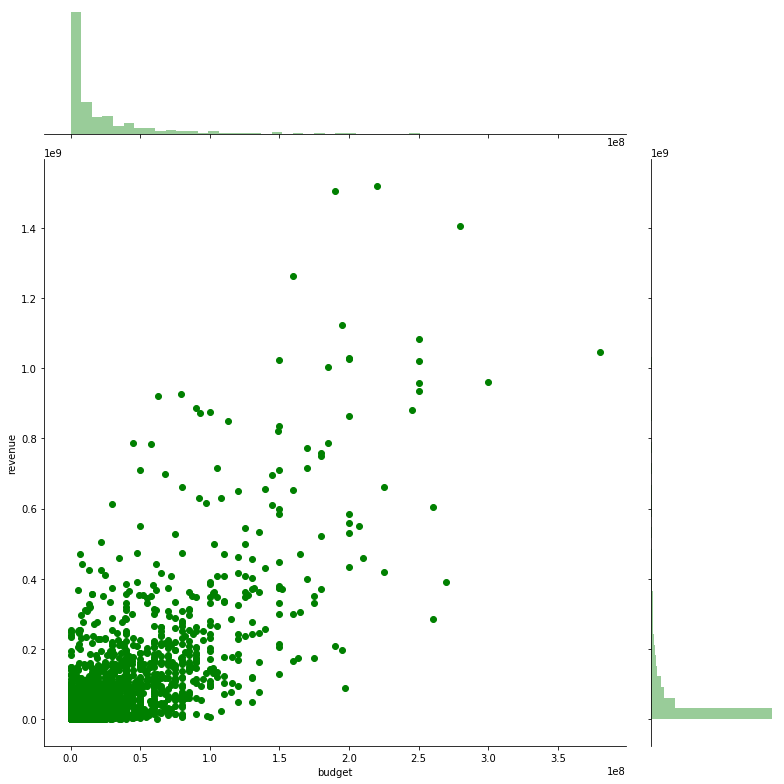

In [12]:
#Plot Budget vs Revenue.
sns.jointplot(x="budget", y="revenue", data=data_train, height=11, ratio=4, color="g")
plt.show()

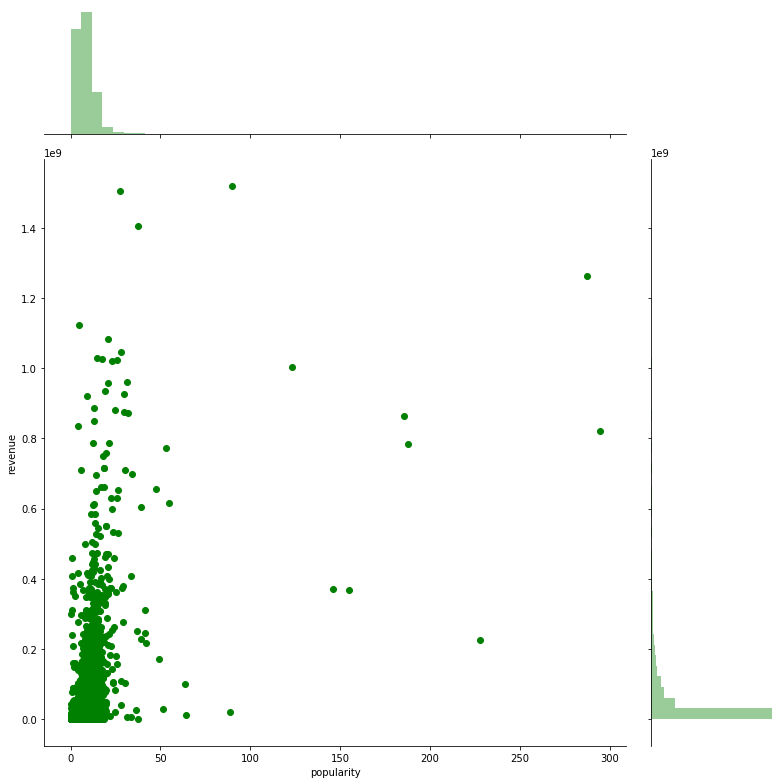

In [13]:
#Plot popularity vs revenue
sns.jointplot(x="popularity", y="revenue", data=data_train, height=11, ratio=4, color="g")
plt.show()

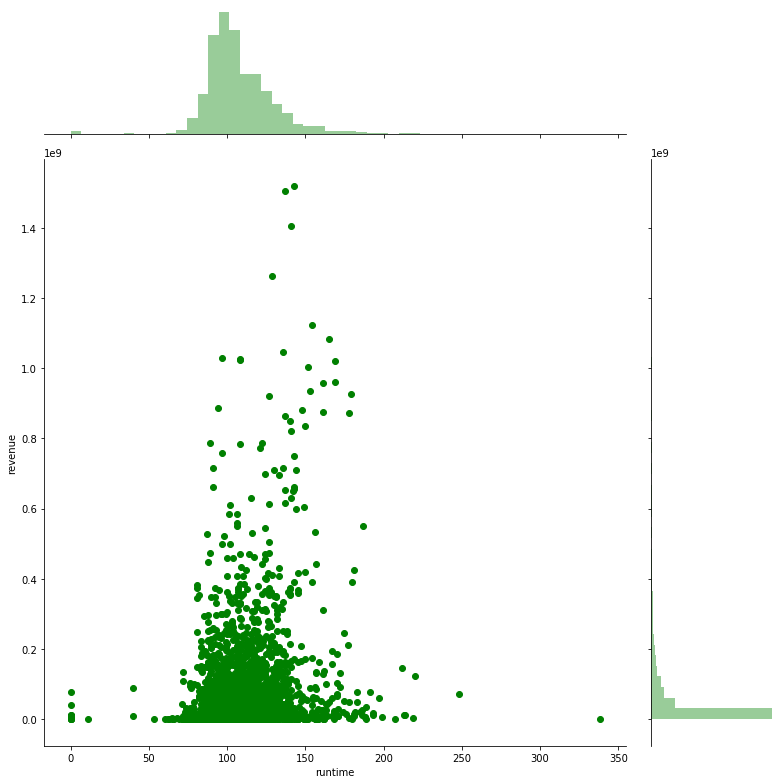

In [14]:
#Plot runtime vs revenue
sns.jointplot(x="runtime", y="revenue", data=data_train, height=11, ratio=4, color="g")
plt.show()

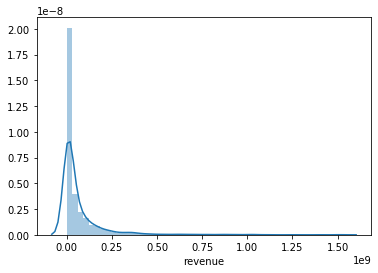

In [15]:
#Revenue (Target Variable) Distribution.
sns.distplot(data_train.revenue)

In [16]:
#Get Month, Day Year, Week day, quarter from release date
combine = [data_train,data_test]

for row in combine:
    row[['release_month','release_day','release_year']]=row['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
    row.loc[ (row['release_year'] <= 19) & (row['release_year'] < 100), "release_year"] += 2000
    row.loc[ (row['release_year'] > 19)  & (row['release_year'] < 100), "release_year"] += 1900

    releaseDate = pd.to_datetime(row['release_date']) 
    row['release_dayofweek'] = releaseDate.dt.dayofweek
    row['release_quarter'] = releaseDate.dt.quarter

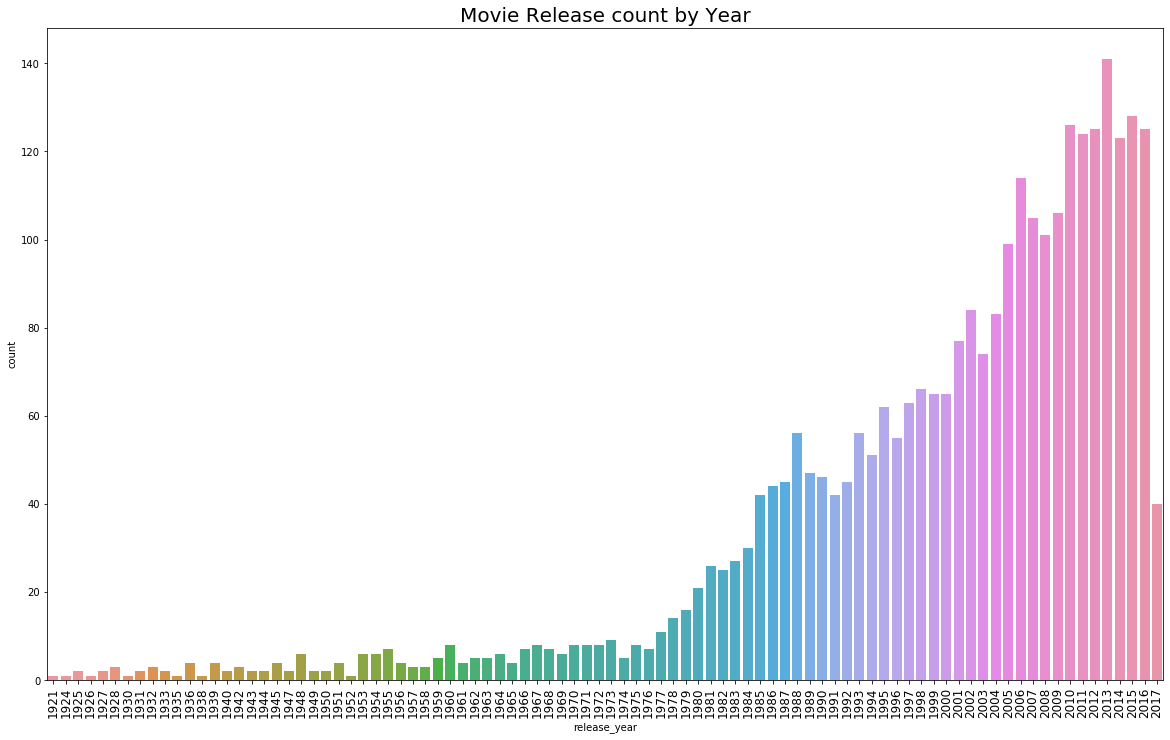

In [17]:
#Plot Release Year Count

plt.figure(figsize=(20,12))
sns.countplot(data_train['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

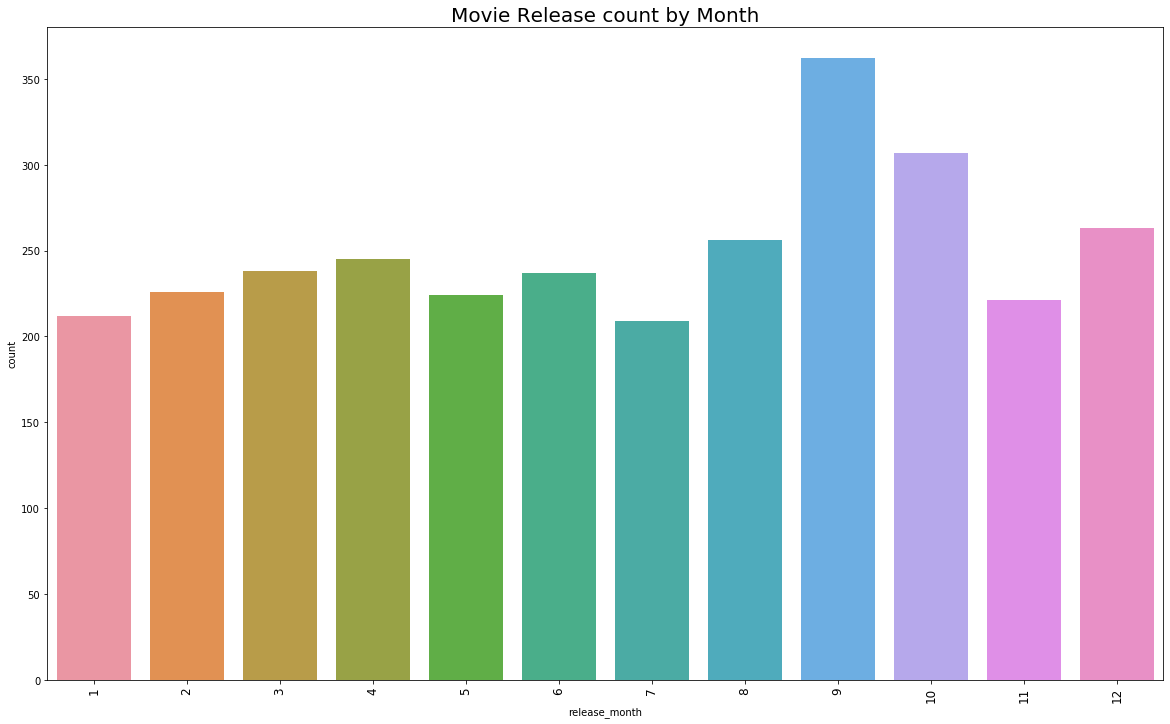

In [18]:
#Plot Release Month Count
plt.figure(figsize=(20,12))
sns.countplot(data_train['release_month'].sort_values())
plt.title("Movie Release count by Month",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

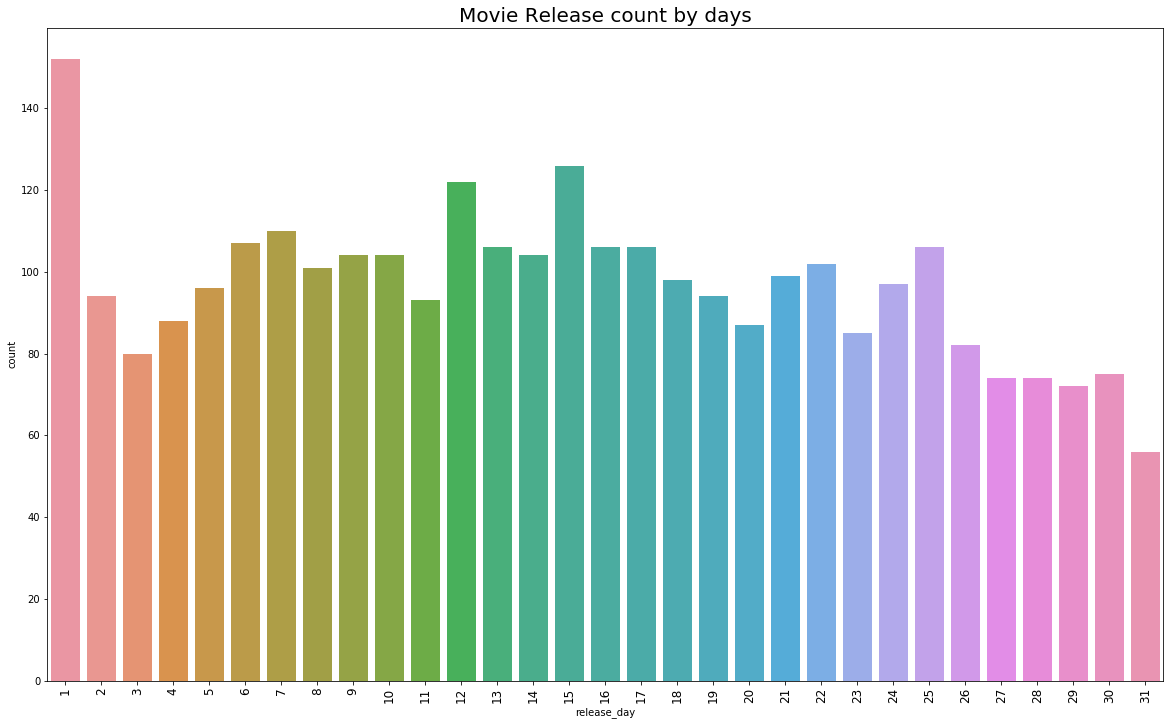

In [19]:
#Plot Release Day

plt.figure(figsize=(20,12))
sns.countplot(data_train['release_day'].sort_values())
plt.title("Movie Release count by days",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

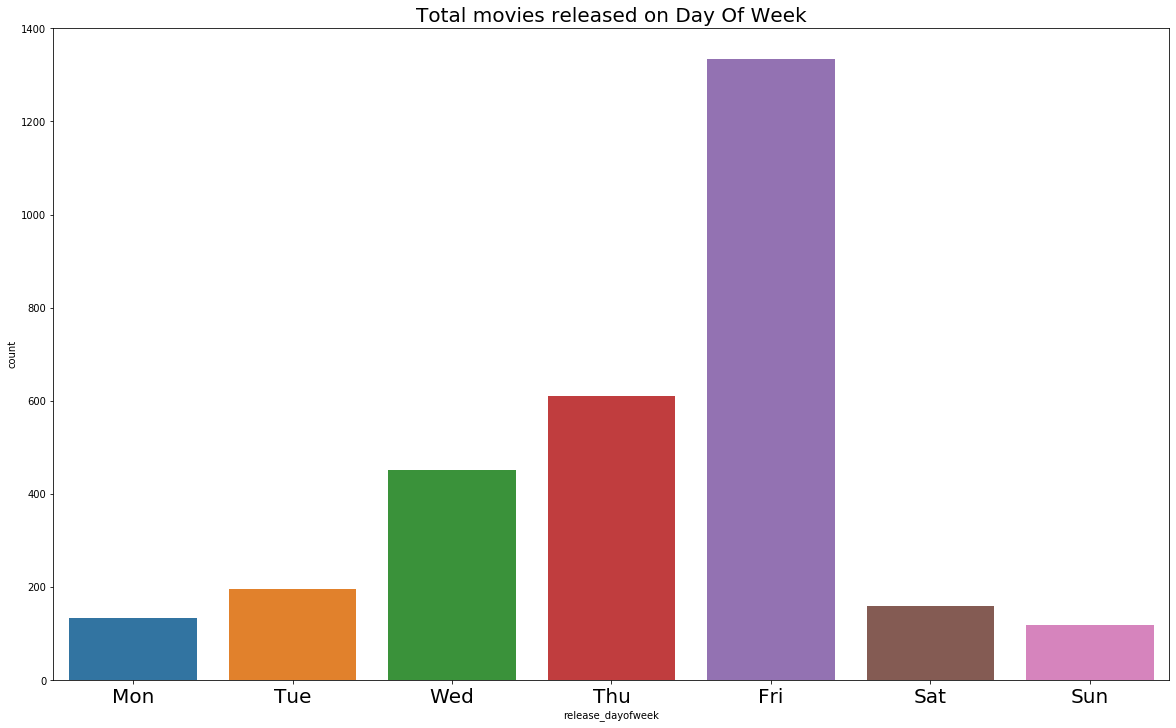

In [20]:
#Plot Release Day of week
plt.figure(figsize=(20,12))
sns.countplot(data_train['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

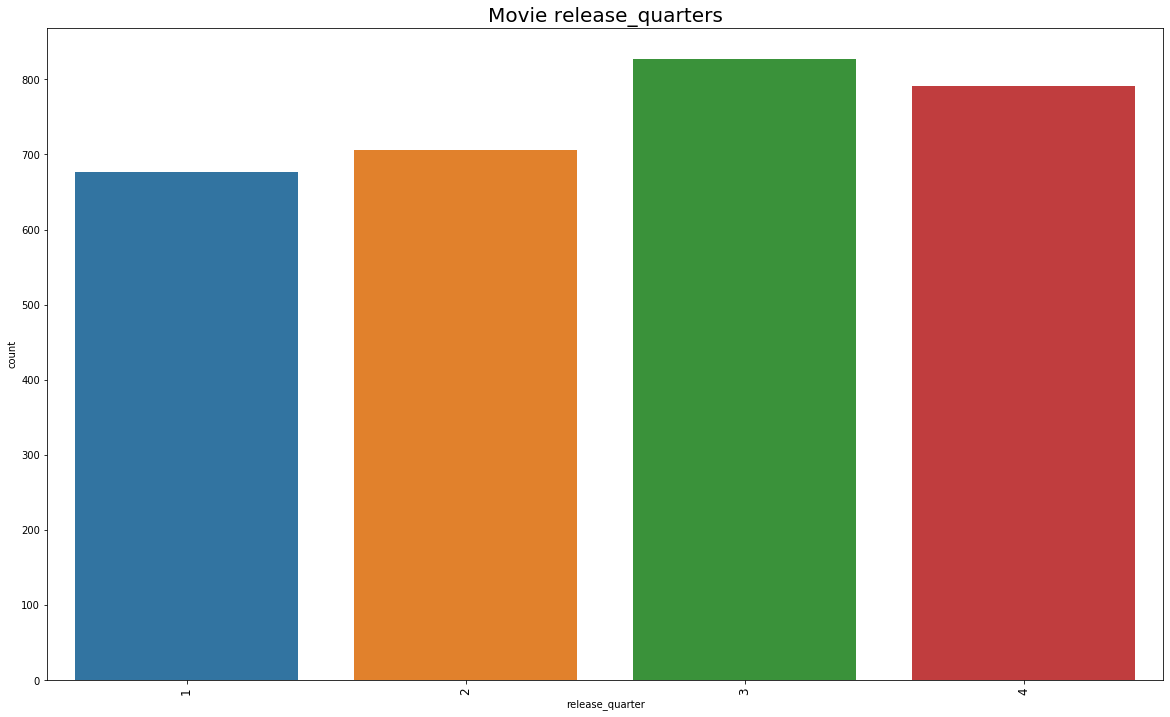

In [21]:
#release_quarter
plt.figure(figsize=(20,12))
sns.countplot(data_train['release_quarter'].sort_values())
plt.title("Movie release_quarters",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [22]:
#data_train['meanRevenueByYear'] = 
data_train[['release_year','revenue']].groupby(['release_year'],as_index = False).mean().sort_values(by='release_year',ascending = True)
#data_train['meanRevenueByYear']

,release_year,revenue
0,1921,2.500000e+06
1,1924,1.213880e+06
2,1925,2.255050e+04
3,1926,9.668780e+05
4,1927,5.139390e+05
...,...,...
85,2013,7.240051e+07
86,2014,7.669008e+07
87,2015,1.038542e+08
88,2016,7.478500e+07


In [23]:
#data_train[['Sibsp','Survived']].groupby(['Sibsp'],as_index =False).mean().sort_values(by = 'Survived',ascending = False)
data_train[['release_month','revenue']].groupby(['release_month'],as_index =False).mean().sort_values(by = 'release_month',ascending = True)

,release_month,revenue
0,1,3.070678e+07
1,2,5.778889e+07
2,3,7.224145e+07
3,4,5.831416e+07
4,5,9.048772e+07
5,6,1.278864e+08
6,7,9.404021e+07
7,8,4.151070e+07
8,9,3.582428e+07
9,10,4.204264e+07


In [24]:
#6th month of an year released most successful films 
#release_day

data_train[['release_day','revenue']].groupby(['release_day'],as_index =False).mean().sort_values(by = 'release_day')

,release_day,revenue
0,1,4.426424e+07
1,2,5.804900e+07
2,3,5.597015e+07
3,4,4.720162e+07
4,5,5.833064e+07
5,6,4.181828e+07
6,7,7.244093e+07
7,8,6.153617e+07
8,9,5.994222e+07
9,10,6.088295e+07


In [25]:
#release_dayofweek

data_train[['release_dayofweek','revenue']].groupby(['release_dayofweek'],as_index =False).mean().sort_values(by = 'release_dayofweek')

,release_dayofweek,revenue
0,0,7.553115e+07
1,1,9.494371e+07
2,2,1.144226e+08
3,3,7.514014e+07
4,4,4.576892e+07
5,5,4.907889e+07
6,6,4.551647e+07


In [26]:
#Runtime corelation

data_train[['runtime','revenue']].groupby(['runtime'],as_index =True).mean().sort_values(by = 'runtime')

,revenue
runtime,
0.0,1.378868e+07
11.0,9.700000e+01
40.0,4.766616e+07
53.0,5.000000e+02
60.0,6.000000e+01
...,...
214.0,1.292394e+07
219.0,3.484331e+06
220.0,1.227000e+08


In [27]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

list_of_genres = data_train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
list_of_genres_testdata = data_test['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [28]:
data_train['noOfGenre'] = list_of_genres
data_test['noOfGenre'] = list_of_genres_testdata

In [29]:
data_train['noOfGenre'].value_counts()

Drama                                         273
Comedy                                        186
Drama,Romance                                 127
Comedy,Drama                                  114
Comedy,Drama,Romance                          110
                                             ... 
Action,Adventure,Comedy,Crime,Drama             1
Comedy,Drama,Music,Romance,Science Fiction      1
Fantasy,Music,Romance                           1
Crime,Drama,History,Western                     1
Adventure,Comedy,Drama,Fantasy                  1
Name: noOfGenre, Length: 538, dtype: int64

In [30]:
#Lets observe noOfGenres.
pd.set_option('display.max_rows', data_train['noOfGenre'].shape[0]+1)
print(data_train['noOfGenre'])

0                                                  Comedy
1                             Comedy,Drama,Family,Romance
2                                                   Drama
3                                          Drama,Thriller
4                                         Action,Thriller
5                              Adventure,Animation,Family
6                                         Horror,Thriller
7                                             Documentary
8                    Action,Adventure,Comedy,Family,Music
9                                            Comedy,Music
10                                                  Drama
11                                                 Comedy
12                                                  Drama
13                                           Comedy,Crime
14                Action,Mystery,Science Fiction,Thriller
15                                     Action,Crime,Drama
16                                        Horror,Thriller
17            

In [31]:
#Moving forward to Status feature
data_train["status"].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [32]:
data_train.loc[data_train['status'] == "Rumored"] [['revenue']]
#data_train.loc[data_train['status'] == "Rumored"]


,revenue
609,273644
1007,60
1216,13418091
1618,229000


In [33]:
#Movies havent been released and there revenue is given, this is strange. Put revenue = 0 where status = rumored
combine2 = [data_train]
for row in combine2:
    row.loc[row['status'] == "Rumored",'revenue'] = 0

In [34]:

pd.set_option('display.max_rows', data_train['original_language'].shape[0]+1)
print(data_train['original_language'])

0       en
1       en
2       en
3       hi
4       ko
5       en
6       en
7       en
8       en
9       en
10      en
11      en
12      en
13      en
14      en
15      sr
16      en
17      en
18      en
19      en
20      en
21      en
22      en
23      en
24      en
25      en
26      en
27      en
28      en
29      en
30      fr
31      fr
32      en
33      en
34      en
35      en
36      en
37      en
38      en
39      en
40      en
41      en
42      en
43      en
44      en
45      it
46      en
47      en
48      en
49      en
50      nl
51      en
52      en
53      en
54      en
55      en
56      fr
57      en
58      en
59      en
60      en
61      en
62      en
63      en
64      en
65      en
66      en
67      zh
68      en
69      en
70      en
71      es
72      en
73      cs
74      en
75      en
76      ta
77      en
78      en
79      en
80      en
81      en
82      en
83      en
84      en
85      en
86      en
87      cn
88      en
89      en
90      en

In [35]:
combine = [data_test,data_train]
for row in combine:
    row["Is_orig_eng"] = 0
    row.loc[row["original_language"] == "en",'Is_orig_eng'] = 1

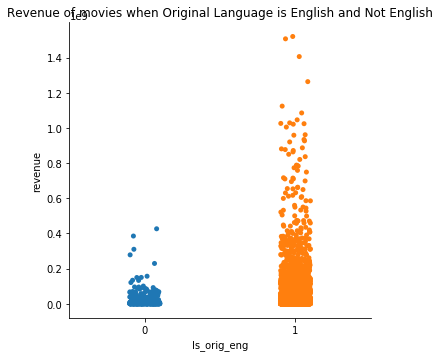

In [36]:
sns.catplot(x="Is_orig_eng", y="revenue", data=data_train)
plt.title('Revenue of movies when Original Language is English and Not English');
#English movies generate more revenue

In [37]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['original_language'], axis=1)
data_test = data_test.drop(['original_language'], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (3000, 27) (4398, 26) (3000, 27) (4398, 26)
After (3000, 26) (4398, 25) (3000, 26) (4398, 25)


In [38]:
#original_title, tagline, has_homepage...
combine = [data_test,data_train]
for row in combine:
    row["Is_orig_title"] = 0
    row.loc[row["original_title"] == row["title"],'Is_orig_title'] = 1

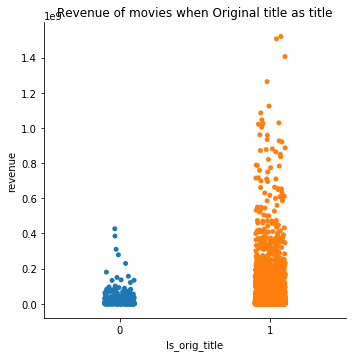

In [39]:
#original_Title
sns.catplot(x="Is_orig_title", y="revenue", data=data_train)
plt.title('Revenue of movies when Original title as title');

In [40]:
combine = [data_test,data_train]
for row in combine:
    row['has_homepage'] = 1
    row.loc[pd.isnull(row['homepage']) ,"has_homepage"] = 0

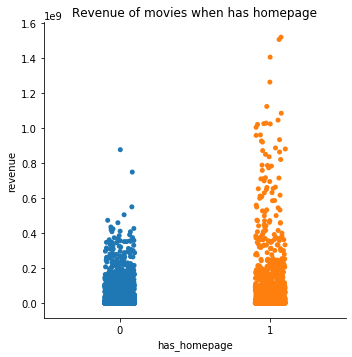

In [41]:
sns.catplot(x="has_homepage", y="revenue", data=data_train)
plt.title('Revenue of movies when has homepage');

In [42]:
combine = [data_test,data_train]
for row in combine:
    row['has_tagline'] = 1
    row.loc[pd.isnull(row['tagline']) ,"has_tagline"] = 0

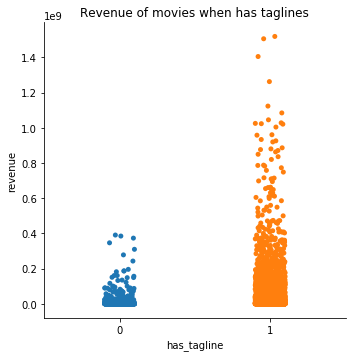

In [43]:
sns.catplot(x="has_tagline", y="revenue", data=data_train)
plt.title('Revenue of movies when has taglines');

In [44]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['original_title','homepage','tagline','genres','imdb_id','production_companies','production_countries','release_date','overview','spoken_languages','overview','spoken_languages','title','cast','crew'], axis=1)
data_test = data_test.drop(['original_title','homepage','tagline','genres','imdb_id','production_companies','production_countries','release_date','overview','spoken_languages','overview','spoken_languages','title','cast','crew'], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (3000, 29) (4398, 28) (3000, 29) (4398, 28)
After (3000, 16) (4398, 15) (3000, 16) (4398, 15)


In [45]:
pd.set_option('display.max_rows', data_train.shape[0]+1)
print(data_train.head(1))
#data_train.head(1)

   id    budget  popularity  runtime    status   revenue  release_month  \
0   1  14000000    6.575393     93.0  Released  12314651              2   

   release_day  release_year  release_dayofweek  release_quarter noOfGenre  \
0           20          2015                  4                1    Comedy   

   Is_orig_eng  Is_orig_title  has_homepage  has_tagline  
0            1              1             0            1  


In [46]:
pd.set_option('display.max_rows', data_test.shape[0]+1)
print(data_test.head(1))

     id  budget  popularity  runtime    status  release_month  release_day  \
0  3001       0    3.851534     90.0  Released              7           14   

   release_year  release_dayofweek  release_quarter  \
0          2007                  5                3   

                            noOfGenre  Is_orig_eng  Is_orig_title  \
0  Adventure,Animation,Family,Fantasy            0              0   

   has_homepage  has_tagline  
0             1            1  


In [47]:
combine = [data_test,data_train]
for row in combine:
    row['Isreleased'] = 0
    row.loc[row["status"] == 'Released','Isreleased'] = 1
    

In [48]:
combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['status'], axis=1)
data_test = data_test.drop(['status'], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (3000, 17) (4398, 16) (3000, 17) (4398, 16)
After (3000, 16) (4398, 15) (3000, 16) (4398, 15)


In [49]:
pd.set_option('display.max_rows', data_train.shape[0]+1)
print(data_train.head(1))


   id    budget  popularity  runtime   revenue  release_month  release_day  \
0   1  14000000    6.575393     93.0  12314651              2           20   

   release_year  release_dayofweek  release_quarter noOfGenre  Is_orig_eng  \
0          2015                  4                1    Comedy            1   

   Is_orig_title  has_homepage  has_tagline  Isreleased  
0              1             0            1           1  


In [50]:
#Binning of budget

data_train["budgetbands"] = pd.cut(data_train["budget"],5)
data_train[['budgetbands','revenue']].groupby(['budgetbands'],as_index = False).mean().sort_values(by='budgetbands', ascending=True)

,budgetbands,revenue
0,"(-380000.0, 76000000.0]",4.308215e+07
1,"(76000000.0, 152000000.0]",2.739972e+08
2,"(152000000.0, 228000000.0]",6.121363e+08
3,"(228000000.0, 304000000.0]",8.525643e+08
4,"(304000000.0, 380000000.0]",1.045714e+09


In [51]:
#Let us replace Age budget ordinals based on these bands.
combine = [data_train, data_test]
for row in combine:
    row.loc[row["budget"] <= 76000000,'budget'] = 0
    row.loc[(row['budget'] > 76000000) & (row["budget"] <= 152000000),'budget'] = 1
    
    row.loc[(row["budget"] > 152000000) & (row["budget"] <= 228000000),'budget'] = 2
    row.loc[(row["budget"] > 228000000) & (row["budget"] <= 304000000),'budget'] = 3
    row.loc[row["budget"] > 304000000,'budget' ] = 4
data_train["budget"] = data_train["budget"].astype(int)

In [52]:
#Binning of popularity

data_train["popularitybands"] = pd.cut(data_train["popularity"],5)
data_train[['popularitybands','revenue']].groupby(['popularitybands'],as_index = False).mean().sort_values(by='popularitybands', ascending=True)

,popularitybands,revenue
0,"(-0.294, 58.867]",6.452856e+07
1,"(58.867, 117.735]",4.135004e+08
2,"(117.735, 176.602]",5.812656e+08
3,"(176.602, 235.47]",6.236801e+08
4,"(235.47, 294.337]",1.041733e+09


In [53]:
combine = [data_train, data_test]
for row in combine:
    row.loc[row["popularity"] <=  0.8,'popularity'] = 0
    row.loc[(row['popularity'] > 0.8) & (row["popularity"] <= 1.6),'popularity'] = 1
    
    row.loc[(row["popularity"] > 1.6) & (row["popularity"] <= 2.4),'popularity'] = 2
    row.loc[(row["popularity"] > 2.4) & (row["popularity"] <= 3.2),'popularity'] = 3
    row.loc[row["popularity"] > 3.2,'popularity' ] = 4
data_train["popularity"] = data_train["popularity"].astype(int)

In [54]:
#Binning of runtime

data_train["runtimebands"] = pd.cut(data_train["runtime"],5)
data_train[['runtimebands','revenue']].groupby(['runtimebands'],as_index = False).mean().sort_values(by='runtimebands', ascending=True)

,runtimebands,revenue
0,"(-0.338, 67.6]",1.211303e+07
1,"(67.6, 135.2]",5.740018e+07
2,"(135.2, 202.8]",1.626442e+08
3,"(202.8, 270.4]",5.291458e+07
4,"(270.4, 338.0]",8.712790e+05


In [55]:
combine = [data_train, data_test]
for row in combine:
    row.loc[row["runtime"] <=  67.6,'runtime'] = 0
    row.loc[(row['runtime'] > 67.6) & (row["runtime"] <= 135.2),'runtime'] = 1
    
    row.loc[(row["runtime"] > 135.2) & (row["runtime"] <= 202.8),'runtime'] = 2
    row.loc[(row["runtime"] > 202.8) & (row["runtime"] <= 270.4),'runtime'] = 3
    row.loc[row["runtime"] > 270.4,'runtime' ] = 4
data_train["runtime"] = data_train["runtime"].astype(int)

In [56]:
pd.set_option('display.max_rows', data_train.shape[0]+1)
print(data_train.head(1))


   id  budget  popularity  runtime   revenue  release_month  release_day  \
0   1       0           4        1  12314651              2           20   

   release_year  release_dayofweek  release_quarter noOfGenre  Is_orig_eng  \
0          2015                  4                1    Comedy            1   

   Is_orig_title  has_homepage  has_tagline  Isreleased  \
0              1             0            1           1   

               budgetbands   popularitybands   runtimebands  
0  (-380000.0, 76000000.0]  (-0.294, 58.867]  (67.6, 135.2]  


In [57]:
combine2 = [data_train]
#print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['budgetbands','popularitybands','runtimebands'], axis=1)
#data_test = data_test.drop(['budgetbands','popularitybands','runtimebands'], axis=1)
#combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape)

After (3000, 16) (4398, 15)


In [58]:
genres = data_train.noOfGenre.str.get_dummies(sep=',')
genres.drop(['TV Movie'], axis=1,inplace=True)
#genres['TV Movie']
#genres.most_common()
data_train = pd.concat([data_train, genres], axis=1, sort=False)

In [59]:
genres = data_test.noOfGenre.str.get_dummies(sep=',')
data_test = pd.concat([data_test, genres], axis=1, sort=False)

In [60]:

pd.set_option('display.max_rows', data_train.shape[0]+1)
print(data_train.head(1))
print(data_test.head(1))


   id  budget  popularity  runtime   revenue  release_month  release_day  \
0   1       0           4        1  12314651              2           20   

   release_year  release_dayofweek  release_quarter  ... Foreign  History  \
0          2015                  4                1  ...       0        0   

   Horror  Music  Mystery  Romance  Science Fiction  Thriller  War  Western  
0       0      0        0        0                0         0    0        0  

[1 rows x 35 columns]
     id  budget  popularity  runtime  release_month  release_day  \
0  3001       0         4.0      1.0              7           14   

   release_year  release_dayofweek  release_quarter  \
0          2007                  5                3   

                            noOfGenre  ...  Foreign  History  Horror  Music  \
0  Adventure,Animation,Family,Fantasy  ...        0        0       0      0   

   Mystery  Romance  Science Fiction  Thriller  War  Western  
0        0        0                0       

### We are facing issues in columns of train and test data , it should be equal .i.e 36,36 or 34,34

In [64]:
#Delete noOfGenre  
combine = [data_train,data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

data_train = data_train.drop(['noOfGenre'], axis=1)
data_test = data_test.drop(['noOfGenre'], axis=1)
combine = [data_train, data_test]

print("After", data_train.shape, data_test.shape, combine[0].shape, combine[1].shape)

Before (3000, 35) (4398, 34) (3000, 35) (4398, 34)
After (3000, 34) (4398, 33) (3000, 34) (4398, 33)


### Work with modeling

In [66]:
X_Train = data_train.drop("revenue",axis =1)
Y_Train = data_train["revenue"]
#X_Test = data_test.drop(["id"],axis =1)
X_Test = data_test

X_Train.shape,Y_Train.shape,X_Test.shape


((3000, 33), (3000,), (4398, 33))

In [67]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)
Y_pred = logreg.predict(X_Test)
acc_log = round(logreg.score(X_Train, Y_Train) * 100, 2)
acc_log

c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\adeel\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


84.3

In [70]:
submission = pd.DataFrame({
        "id": data_test["id"],
        "revenue": Y_pred
    })
submission.to_csv('MoviePred_Kaggle/submission_Kaggle.csv', index=False)